In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
np.random.seed(10001)
import random
import tensorflow as tf
random.seed(10002)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=6, inter_op_parallelism_threads=5)
from keras import backend

tf.set_random_seed(10003)
backend.set_session(tf.Session(graph=tf.get_default_graph(), config=session_conf))
# Any results you write to the current directory are saved as output.

In [0]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Data_Test.xlsx')
#s=pd.read_excel('Sample_submission.xlsx')

In [0]:
train.head(5)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [0]:
test.head(5)

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [0]:

train['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

Text(0, 0.5, 'Number of reviews ')

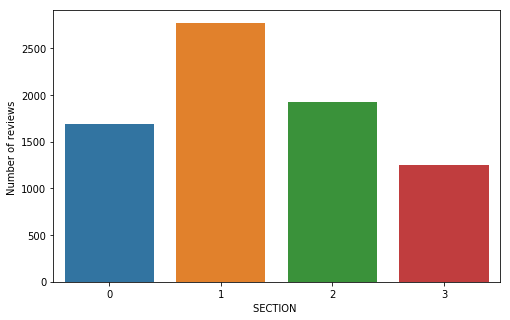

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array(train['SECTION'].value_counts().index)
y = np.array(train['SECTION'].value_counts().values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('SECTION ')
plt.ylabel('Number of reviews ')

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

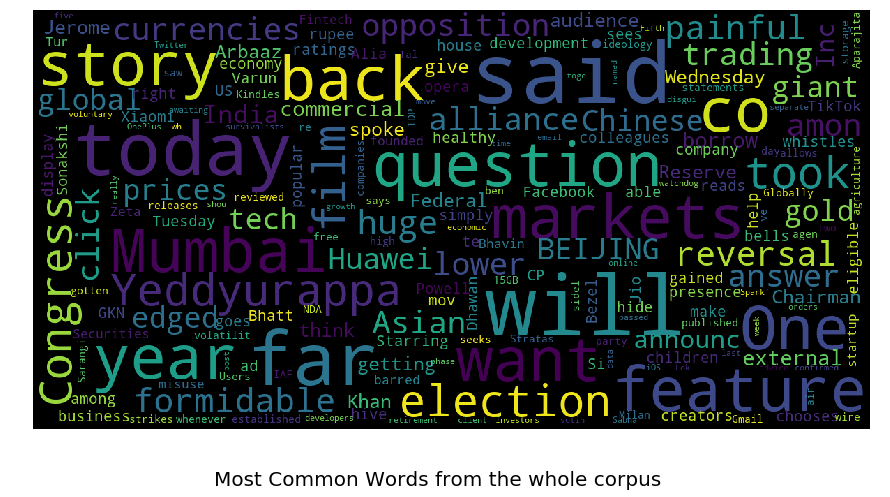

In [0]:
show_wordcloud(train['STORY'],'Most Common Words from the whole corpus')

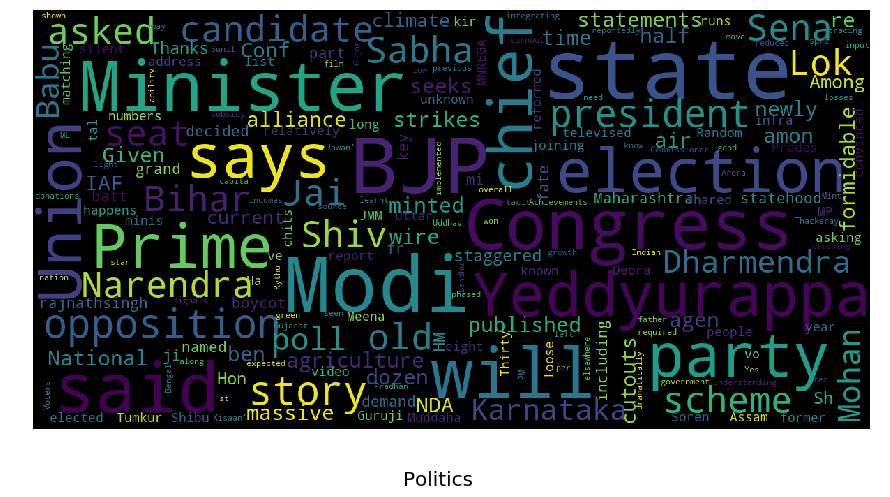

In [0]:
show_wordcloud(train[train['SECTION'] == 0]['STORY'],'Politics')

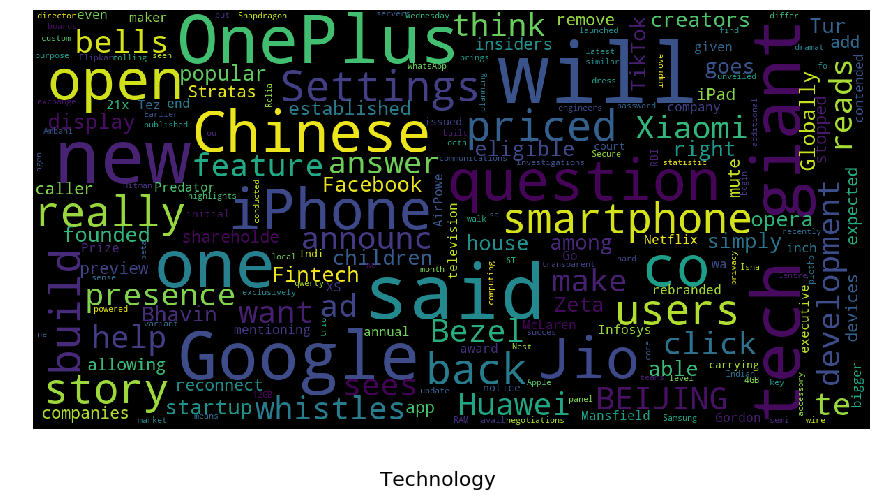

In [0]:
show_wordcloud(train[train['SECTION'] == 1]['STORY'],'Technology')

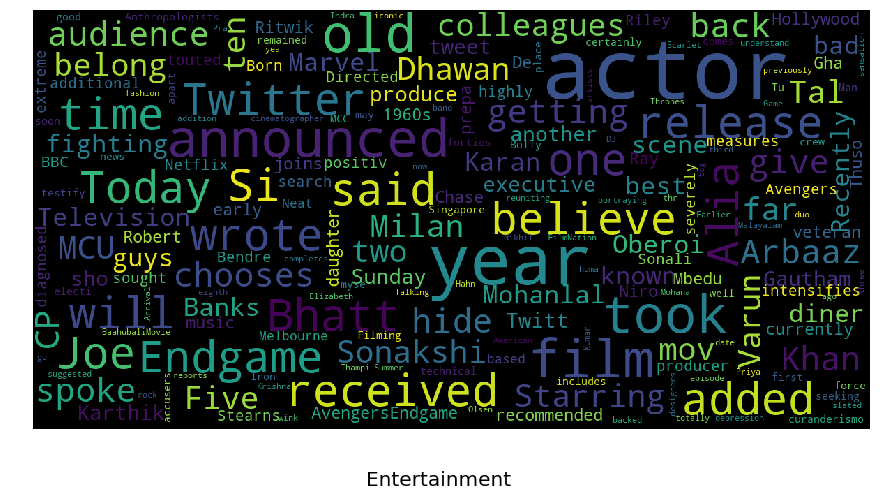

In [0]:
show_wordcloud(train[train['SECTION'] == 2]['STORY'],'Entertainment')

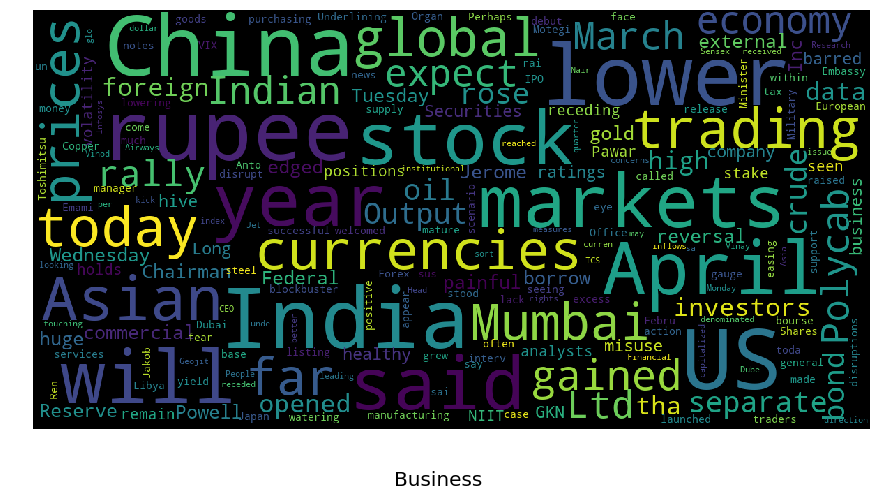

In [0]:
show_wordcloud(train[train['SECTION'] == 3]['STORY'],'Business')

In [0]:
df=train.append(test,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import string
punctuation=string.punctuation
df['word_count']=df['STORY'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['STORY'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['STORY'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['STORY'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics'] = df['STORY'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['upper'] = df['STORY'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['STORY'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [0]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
labelencoder_X = LabelEncoder()
#test['drug'] = labelencoder_X.fit_transform(test['drug']) # All rows and first column i.e country column

In [0]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = Tokenizer()

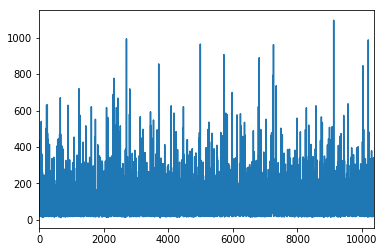

In [0]:
df.word_count.plot()

In [0]:
df_train = df[df['SECTION'].isnull()==False]
df_test = df[df['SECTION'].isnull()==True]
print(df_train.shape,df_test.shape)

(7628, 10) (2748, 10)


In [0]:
y = train['SECTION']

In [0]:
df.columns
col=[x for x in df.columns if x not in ['SECTION','STORY']]

In [0]:
from sklearn.model_selection import train_test_split
# x_train , x_val, y_train , y_val = train_test_split(final_features,y,test_size = 0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score
from lightgbm import LGBMClassifier

In [0]:
# # lr = LogisticRegression()
# # ovr = OneVsRestClassifier(lr)
# # ovr.fit(x_train,y_train)
# # print(classification_report( ovr.predict(x_val) , y_val))
# # print(accuracy_score( ovr.predict(x_val) , y_val ))
# # print(f1_score( ovr.predict(x_val) , y_val ,average='macro'))

# m=LGBMClassifier(boosting_type='gbdt',
# #                  objective= 'multiclass',
# #     num_leaves=255,
# #     max_depth=-1,
#     learning_rate=0.01,
#     n_estimators=6000,
# #     subsample_for_bin=200000,
# #     objective=None,
# #     class_weight=None,
# #     min_split_gain=0.0,
# #     min_child_weight=0.001,
#     min_child_samples=100,
# #                 ,
# #     subsample=1.0,
# #     subsample_freq=1,
# #     colsample_bytree=0.4,
# #     reg_alpha=0.5,
# #     reg_lambda=1.0,
#     random_state=1994,
#     n_jobs=-1,
#     silent=True)
# m.fit(X_train,y_train,eval_set=[(X_val, y_val.values)],early_stopping_rounds=100,verbose=100)
# p=m.predict(X_val)
# print(classification_report( p , y_val))
# print(f1_score(y_val,p,average='macro'))

In [0]:
# svm = LinearSVC()
# svm.fit(x_train,y_train)
# print(classification_report( svm.predict(x_val) , y_val))
# print(accuracy_score( svm.predict(x_val) , y_val ))
# print(f1_score( svm.predict(x_val) , y_val ,average='macro'))

# estimators = [ ('svm',svm) , ('ovr' , ovr) ]
# clf = VotingClassifier(estimators , voting='hard')
# clf.fit(x_train,y_train)
# print(classification_report( clf.predict(x_val) , y_val))
# print(accuracy_score( clf.predict(x_val) , y_val ))
# print(f1_score( ovr.predict(x_val) , y_val ,average='macro'))

In [0]:
from keras.utils import to_categorical
target=train.SECTION.values
y=to_categorical(target)
y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

##DATA PREPROCESSING


In [0]:
import re
import nltk

def url_to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z0-9]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = stop                 
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [0]:
# freq = pd.Series(' '.join(df_train['text']).split()).value_counts()[:10]
# freq = list(freq.index)
# df_train['text'] = df_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# freq = pd.Series(' '.join(df_train['text']).split()).value_counts()[-10:]
# freq = list(freq.index)
# df_train['text'] = df_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


# from nltk.stem import PorterStemmer,SnowballStemmer
# st = SnowballStemmer('english')
# df_train['text']=df_train['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# df_test['text']=df_test['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# print('Done')
# from textblob import Word
# df_train['text'] = df_train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
# df_test['text']=df_test['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [0]:

df_train['STORY']=df_train['STORY'].apply(url_to_words)
df_test['STORY']=df_test['STORY'].apply(url_to_words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_train['STORY'].values

array(['painful huge reversal fee income unheard among private sector lenders essentially means yes bank took granted fees structured loan deals paid accounted upfront books borrowers turned defaulters fees tied loan deals fell cracks gill vowed shift safer accounting practice amortizing fee income rather booking upfront gill move mend past ways means nasty surprises future good news considering investors love clean image loathe uncertainties gain without pain promise strong stable balance sheet comes sacrifices well investors give hopes phenomenal growth promise made kapoor',
       'formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha prajatantrik',
       'asian currencies trading lower today south korean 0 4 china renminbi 0 23 china offshore 0 15 malaysian ringgit 0 12 indonesian rupiah 0 11 taiwan dollar 0 06 however japanese yen 0 32 dollar index measures us currency strength major currencies trading 97 26 0 14 previous close 97 395',
 

In [0]:

from scipy.sparse import csr_matrix
from scipy import sparse
# final_features = sparse.hstack((df_train[col],train_vectorized )).tocsr()
# final_featurest = sparse.hstack((df_test[col],test_vectorized )).tocsr()

from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(df_train['STORY'],y,test_size = 0.25)
# X_train , X_val , Y_train , Y_val = train_test_split(final_features,y,test_size = 0.20)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping,ReduceLROnPlateau

In [0]:
tokenizer = Tokenizer(num_words=50000,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(list(X_train))

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [0]:
# X_train
# nb_words = 
max_features = len(word_index) + 1
max_words = 350
batch_size = 1024
epochs = 10
num_classes=4

In [0]:
X_test = tokenizer.texts_to_sequences(df_test['STORY'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [0]:
# X_val
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)

In [0]:
# import tensorflow as tf
# from keras.losses import binary_crossentropy, categorical_crossentropy
# import keras.backend as K
# import numpy as np
# from prettytable import PrettyTable
# from prettytable import ALL
# from sklearn.metrics import f1_score
# def f1(y_true, y_pred):
#     y_pred = K.round(y_pred)
#     tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
#     tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
#     fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2*p*r / (p+r+K.epsilon())
#     f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
#     return K.mean(f1)

# def f1_loss(y_true, y_pred):
    
#     tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
#     tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
#     fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2*p*r / (p+r+K.epsilon())
#     f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
#     return 1 - K.mean(f1)

In [0]:
from keras.engine.topology import Layer
from keras import backend as K
from keras import initializers, regularizers, constraints, optimizers, layers
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [0]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py

--2019-09-01 19:28:38--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   104MB/s    in 3.7s    

2019-09-01 19:28:42 (104 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

--2019-09-01 19:28:43--  https://raw.githubusercontent.com/google-research/bert/master/modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37922 (37K) [tex

In [0]:
import modeling
import optimization
import run_classifier
import tokenization

W0901 19:28:54.028317 140007472330624 deprecation_wrapper.py:119] From /content/optimization.py:87: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
import zipfile
folder = 'model_folder'
with zipfile.ZipFile("uncased_L-12_H-768_A-12.zip","r") as zip_ref:
    zip_ref.extractall(folder)

In [0]:
BERT_MODEL = 'uncased_L-12_H-768_A-12'
BERT_PRETRAINED_DIR = f'{folder}/uncased_L-12_H-768_A-12'
OUTPUT_DIR = f'{folder}/outputs'
print(f'>> Model output directory: {OUTPUT_DIR}')
print(f'>>  BERT pretrained directory: {BERT_PRETRAINED_DIR}')

>> Model output directory: model_folder/outputs
>>  BERT pretrained directory: model_folder/uncased_L-12_H-768_A-12


In [0]:
df_train["SECTION"].values.astype(int)

array([3, 0, 3, ..., 1, 0, 2])

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(df_train["text"].values, df_train["sentiment"].values.astype(int), test_size=0.2, random_state=42)

In [0]:
def create_examples(lines, set_type, labels=None):
#Generate data for the BERT model
    guid = f'{set_type}'
    examples = []
    if guid == 'train':
        for line, label in zip(lines, labels):
            text_a = line
            label = str(label)
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    else:
        for line in lines:
            text_a = line
            label = '0'
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    return examples

In [0]:
# Model Hyper Parameters
TRAIN_BATCH_SIZE = 32
EVAL_BATCH_SIZE = 32
LEARNING_RATE = 1e-5
NUM_TRAIN_EPOCHS = 3
WARMUP_PROPORTION = 0.1
MAX_SEQ_LENGTH = 100
# Model configs
SAVE_CHECKPOINTS_STEPS = 100000 #if you wish to finetune a model on a larger dataset, use larger interval
# each checpoint weights about 1,5gb
ITERATIONS_PER_LOOP = 100000
NUM_TPU_CORES = 8
VOCAB_FILE = os.path.join(BERT_PRETRAINED_DIR, 'vocab.txt')
CONFIG_FILE = os.path.join(BERT_PRETRAINED_DIR, 'bert_config.json')
INIT_CHECKPOINT = os.path.join(BERT_PRETRAINED_DIR, 'bert_model.ckpt')
DO_LOWER_CASE = BERT_MODEL.startswith('uncased')

In [0]:
label_list = [0,1,2,3]
tokenizer = tokenization.FullTokenizer(vocab_file=VOCAB_FILE, do_lower_case=DO_LOWER_CASE)
train_examples = create_examples(df_train["STORY"].values, 'train', labels=df_train["SECTION"].values.astype(int))

tpu_cluster_resolver = None #Since training will happen on GPU, we won't need a cluster resolver
#TPUEstimator also supports training on CPU and GPU. You don't need to define a separate tf.estimator.Estimator.
run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    model_dir=OUTPUT_DIR,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=ITERATIONS_PER_LOOP,
        num_shards=NUM_TPU_CORES,
        per_host_input_for_training=tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2))

W0901 19:28:59.530943 140007472330624 deprecation_wrapper.py:119] From /content/tokenization.py:125: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0901 19:29:01.190272 140007472330624 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
num_train_steps = int(
    len(train_examples) / TRAIN_BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

model_fn = run_classifier.model_fn_builder(
    bert_config=modeling.BertConfig.from_json_file(CONFIG_FILE),
    num_labels=len(label_list),
    init_checkpoint=INIT_CHECKPOINT,
    learning_rate=LEARNING_RATE,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available  
    use_one_hot_embeddings=True)

In [0]:
estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available 
    model_fn=model_fn,
    config=run_config,
    train_batch_size=TRAIN_BATCH_SIZE,
    eval_batch_size=EVAL_BATCH_SIZE)
# train_examples
# label_list

W0901 19:29:36.877272 140007472330624 estimator.py:1984] Estimator's model_fn (<function model_fn_builder.<locals>.model_fn at 0x7f55ae8f8e18>) includes params argument, but params are not passed to Estimator.
W0901 19:29:36.886180 140007472330624 tpu_context.py:211] eval_on_tpu ignored because use_tpu is False.


In [0]:
import datetime
print('Please wait...')
train_features = run_classifier.convert_examples_to_features(train_examples,{'0':0,'1':1,'2':2,'3':3}, MAX_SEQ_LENGTH, tokenizer)
print('>> Started training at {} '.format(datetime.datetime.now()))
print('  Num examples = {}'.format(len(train_examples)))
print('  Batch size = {}'.format(TRAIN_BATCH_SIZE))
tf.logging.info("  Num steps = %d", num_train_steps)
train_input_fn = run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=True)
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print('>> Finished training at {}'.format(datetime.datetime.now()))

W0901 19:29:36.899610 140007472330624 deprecation_wrapper.py:119] From /content/run_classifier.py:774: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.



Please wait...


W0901 19:29:46.633174 140007472330624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


>> Started training at 2019-09-01 19:29:46.610489 
  Num examples = 7628
  Batch size = 32


W0901 19:29:49.161444 140007472330624 deprecation_wrapper.py:119] From /content/modeling.py:171: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0901 19:29:49.165232 140007472330624 deprecation_wrapper.py:119] From /content/modeling.py:409: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0901 19:29:49.195971 140007472330624 deprecation_wrapper.py:119] From /content/modeling.py:490: The name tf.assert_less_equal is deprecated. Please use tf.compat.v1.assert_less_equal instead.

W0901 19:29:49.235741 140007472330624 deprecation.py:506] From /content/modeling.py:358: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0901 19:29:49.253940 140007472330624 deprecation.py:323] From /content/modeling.py:671: dense (from tensorf

KeyboardInterrupt: ignored

In [0]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
num_classes=4
filter_sizes = [1,2,3,4]
num_filters = 36
inp = Input(shape=(max_words,))
x = Embedding(max_features, 300)(inp)
x = Reshape((max_words, 300, 1))(x)
maxpool_pool = []
for i in range(len(filter_sizes)):
    conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], 300),
                                 kernel_initializer='he_normal', activation='relu')(x)
    maxpool_pool.append(MaxPool2D(pool_size=(max_words - filter_sizes[i] + 1, 1))(conv))
z = Concatenate(axis=1)(maxpool_pool)   
z = Flatten()(z)
z = Dropout(0.1)(z)
outp = Dense(num_classes, activation="softmax")(z)
model = Model(inputs=inp, outputs=outp)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

W0901 19:31:42.302988 140007472330624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 19:31:42.355472 140007472330624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 350)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 350, 300)     8628900     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 350, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 350, 1, 36)   10836       reshape_1[0][0]                  
____________________________________________________________________________________________

In [0]:

early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1)
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=20, batch_size=batch_size, verbose=1,callbacks=[early_stopping])

Train on 5721 samples, validate on 1907 samples
Epoch 1/20
5721/5721 [==============================] - 83s 14ms/step - loss: 0.7711 - acc: 0.8277 - val_loss: 0.7549 - val_acc: 0.8207
Epoch 2/20
5721/5721 [==============================] - 82s 14ms/step - loss: 0.5802 - acc: 0.9283 - val_loss: 0.5811 - val_acc: 0.9171
Epoch 3/20
5721/5721 [==============================] - 82s 14ms/step - loss: 0.4095 - acc: 0.9708 - val_loss: 0.4318 - val_acc: 0.9423
Epoch 4/20
5721/5721 [==============================] - 82s 14ms/step - loss: 0.2788 - acc: 0.9822 - val_loss: 0.3213 - val_acc: 0.9539
Epoch 5/20
5721/5721 [==============================] - 82s 14ms/step - loss: 0.1874 - acc: 0.9850 - val_loss: 0.2481 - val_acc: 0.9586
Epoch 6/20
5721/5721 [==============================] - 82s 14ms/step - loss: 0.1281 - acc: 0.9867 - val_loss: 0.2010 - val_acc: 0.9596
Epoch 7/20
5721/5721 [==============================] - 82s 14ms/step - loss: 0.0915 - acc: 0.9890 - val_loss: 0.1705 - val_acc: 0.9617


In [0]:

print(f1_score(np.argmax(model.predict(X_val),axis=1),np.argmax(Y_val,axis=1),average='macro'))
y_pred=model.predict(X_test, verbose=1)
g=np.argmax(y_pred,axis=1)


0.971501393656215
2748/2748 [==============================] - 7s 3ms/step


In [0]:
g

array([1, 2, 1, ..., 1, 0, 1])

In [0]:
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
inp = Input(shape=(max_words,))
x = Embedding(max_features, 300)(inp)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(x)
x = Attention(max_words)(x)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
modelATT = Model(inputs=inp, outputs=x)
modelATT.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])
modelATT.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 350)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 350, 300)          8628900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 350, 256)          440320    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 350, 128)          164864    
_________________________________________________________________
attention_1 (Attention)      (None, 128)               478       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260 

In [0]:
%time
early_stopping = EarlyStopping(monitor="val_acc", patience=3, verbose=1)
historyATT=modelATT.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=10, batch_size=batch_size, verbose=1,callbacks=[early_stopping])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Train on 5721 samples, validate on 1907 samples
Epoch 1/10


InvalidArgumentError: ignored

In [0]:
# model2_GRU=Sequential()
# model2_GRU.add(Embedding(max_features,100,mask_zero=True))
# model2_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
# model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
# model2_GRU.add(Dense(num_classes,activation='sigmoid'))
# model2_GRU.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model2_GRU.summary()
num_classes=4
model2_GRU=Sequential()
model2_GRU.add(Embedding(max_features,300,mask_zero=True))
model2_GRU.add(GRU(64,dropout=0.7))
# model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model2_GRU.add(Dense(num_classes,activation='softmax'))

model2_GRU.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_GRU.summary()

W0731 10:59:49.759159 139793554016128 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0731 10:59:49.787439 139793554016128 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0731 10:59:49.813105 139793554016128 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         8894100   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                70080     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 8,964,440
Trainable params: 8,964,440
Non-trainable params: 0
_________________________________________________________________


In [0]:
submission = pd.DataFrame({ 's': g})
submission.to_csv("AAA.csv", index=False)

In [0]:
from google.colab import files
files.download('AAA.csv')

In [0]:

def transform(df):
#     df['drug_count']=df['text'].apply(lambda x: len(np.intersect1d(x.split(),all_drugs)))
#     df["word_count"] = df["text"].apply(lambda x: len(x.split()))
    df["has_upper"] = df["STORY"].apply(lambda x: x.lower() != x)
    df['upper'] = df['STORY'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    df["sentence_end"] = df["STORY"].apply(lambda x: x.endswith("."))
    df["after_comma"] = df["STORY"].apply(lambda x: x.startswith(","))
    df["sentence_start"] = df["STORY"].apply(lambda x: "A" <= x[0] <= "Z")
    df["STORY"] = df["STORY"].apply(lambda x: x.lower())
    import string
    punctuation=string.punctuation
    df['word_count']=df['STORY'].apply(lambda x: len(str(x).split(" ")))
    df['char_count'] = df['STORY'].str.len()
    def avg_word(sentence):
        words = sentence.split()
        return (sum(len(word) for word in words)/len(words))

    df['avg_word'] = df['STORY'].apply(lambda x: avg_word(x))
    from nltk.corpus import stopwords
    stop = stopwords.words('english')

    df['stopwords'] = df['STORY'].apply(lambda x: len([x for x in x.split() if x in stop]))
    df['numerics'] = df['STORY'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    
    df['word_density'] = df['char_count'] / (df['word_count']+1)
    df['punctuation_count'] = df['STORY'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
    
    return df

train = transform(train)
test = transform(test)

# dense_features = ["phrase_count", "word_count", "has_upper", "after_comma", "sentence_start", "sentence_end",'char_count','avg_word','stopwords','numerics','word_density','punctuation_count','drug','upper']
dense_features = [ "word_count", "has_upper", "after_comma", "sentence_start", "sentence_end",'char_count','avg_word','stopwords','numerics','word_density','punctuation_count','upper']
train.groupby("SECTION")[dense_features].mean()

,word_count,has_upper,after_comma,sentence_start,sentence_end,char_count,avg_word,stopwords,numerics,word_density,punctuation_count,upper
SECTION,,,,,,,,,,,,
0,145.216489,1.0,0.0,0.881376,0.855872,891.572954,5.050634,60.048043,1.411032,6.093278,21.453144,3.650652
1,116.975830,1.0,0.0,0.914502,0.816017,725.632756,5.102057,45.419553,1.181457,6.140699,17.458153,3.074315
2,60.610707,1.0,0.0,0.865904,0.000000,359.120062,4.879279,25.444906,0.355509,5.790642,5.685551,0.858628
3,98.569021,1.0,0.0,0.894864,0.897271,611.605939,5.094039,36.009631,0.836276,6.124653,18.427769,2.209470


In [0]:
# train["drug"]%5

import re
import nltk
from nltk.corpus import stopwords
def url_to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z0-9]", " ",no_encoding) 
    words = letters_only.split()                             
    stops = stopwords.words('english')         
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))


train['STORY']=train['STORY'].apply(url_to_words)
test['STORY']=test['STORY'].apply(url_to_words)

In [0]:
test.shape

(2748, 13)

In [0]:
train.SECTION.value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [0]:
NUM_FOLDS = 7
train["fold_id"] = train.reset_index()['index'].apply(lambda x: x%NUM_FOLDS)
train.head()

,STORY,SECTION,has_upper,upper,sentence_end,after_comma,sentence_start,word_count,char_count,avg_word,stopwords,numerics,word_density,punctuation_count,fold_id
0,painful huge reversal fee income unheard among...,3,True,0,True,False,True,146,843,4.675676,66,0,5.734694,12,0
1,formidable opposition alliance among congress ...,0,True,1,False,False,True,17,129,6.647059,4,0,7.166667,6,1
2,asian currencies trading lower today south kor...,3,True,1,True,False,True,57,386,5.637931,17,0,6.655172,31,2
3,want answer question click answer clicking ans...,1,True,1,True,False,True,101,587,4.669903,52,0,5.754902,12,3
4,global markets gold prices edged today disappo...,3,True,0,True,False,True,46,299,5.521739,9,0,6.361702,10,4


In [0]:
# train["fold_id"].value_counts()
# train.groupby(['fold_id','sentiment']).count()
from sklearn.utils import shuffle
train=shuffle(train)

In [0]:

# EMBEDDING_FILE = "../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt"
EMBEDDING_DIM = 300

# all_words = set(cv1.vocabulary_.keys()).union(set(cv2.vocabulary_.keys()))

# def get_embedding():
#     embeddings_index = {}
#     f = open(EMBEDDING_FILE)
#     for line in f:
#         values = line.split()
#         word = values[0]
#         if len(values) == EMBEDDING_DIM + 1 and word in all_words:
#             coefs = np.asarray(values[1:], dtype="float32")
#             embeddings_index[word] = coefs
#     f.close()
#     return embeddings_index

# embeddings_index = get_embedding()
# print("Number of words that don't exist in GLOVE:", len(all_words - set(embeddings_index)))

In [0]:
train.SECTION.value_counts()
# print(2999-837)

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [0]:
# 
train[train['SECTION']==1].shape

(2772, 15)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 350

tokenizer = Tokenizer()
tokenizer.fit_on_texts(np.append(train["STORY"].values, test["STORY"].values))
word_index = tokenizer.word_index
seq = pad_sequences(tokenizer.texts_to_sequences(train["STORY"]), maxlen=MAX_SEQUENCE_LENGTH)
test_seq = pad_sequences(tokenizer.texts_to_sequences(test["STORY"]), maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
nb_words = len(word_index) + 1
nb_words

37025

In [0]:
from keras.engine.topology import Layer
from keras import backend as K
from keras import initializers, regularizers, constraints, optimizers, layers
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.models import Sequential

def build_model():
    embedding_layer = Embedding(nb_words,
                                300,
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    dropout = SpatialDropout1D(0.2)
    mask_layer = Masking()
    lstm_layer = LSTM(100,recurrent_dropout=0.2)
    seq_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")
    dense_input = Input(shape=(len(dense_features),))
    dense_vector = BatchNormalization()(dense_input)
    phrase_vector = lstm_layer(mask_layer(dropout(embedding_layer(seq_input))))
    
    feature_vector = concatenate([phrase_vector, dense_vector])
    feature_vector = Dense(64, activation="relu")(feature_vector)
#     feature_vector = Dense(20, activation="relu")(feature_vector)
    
    output = Dense(4, activation="softmax")(feature_vector)
    
    model = Model(inputs=[seq_input, dense_input], outputs=output)
    return model

def build_model_only():
    model5_CNN= Sequential()
    model5_CNN.add(Embedding(nb_words,300,input_length=MAX_SEQUENCE_LENGTH))
    model5_CNN.add(Dropout(0.2))
    model5_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
    model5_CNN.add(GlobalMaxPooling1D())
    model5_CNN.add(Dense(128,activation='relu'))
    model5_CNN.add(Dropout(0.2))
    model5_CNN.add(Dense(3,activation='softmax'))
    model5_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model5_CNN

In [0]:
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
def buildAtt_layer():

    inp = Input(shape=(MAX_SEQUENCE_LENGTH,))
    x = Embedding(nb_words, 300)(inp)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(x)
    x = Attention(MAX_SEQUENCE_LENGTH)(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(4, activation="softmax")(x)
    modelATT = Model(inputs=inp, outputs=x)
#     modelATT.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])
    modelATT.summary()
    return modelATT

In [0]:
dense_features

['word_count',
 'has_upper',
 'after_comma',
 'sentence_start',
 'sentence_end',
 'char_count',
 'avg_word',
 'stopwords',
 'numerics',
 'word_density',
 'punctuation_count',
 'upper']

In [0]:
# test_seq
test[dense_features].head()

,word_count,has_upper,after_comma,sentence_start,sentence_end,char_count,avg_word,stopwords,numerics,word_density,punctuation_count,upper
0,231,True,False,False,True,1558,5.563559,74,2,6.715517,37,5
1,45,True,False,True,False,250,4.413043,23,1,5.434783,1,2
2,264,True,False,True,True,1602,4.892593,114,3,6.045283,30,6
3,131,True,False,True,True,813,5.090226,59,3,6.159091,21,2
4,217,True,False,True,True,1263,4.648649,94,5,5.793578,19,6


In [0]:
from keras.optimizers import Adam

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import textblob
enc = OneHotEncoder(sparse=False)
enc.fit(train["SECTION"].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [0]:
test_preds1 = np.zeros((test.shape[0], 4))
from sklearn.metrics import f1_score

for i in range(NUM_FOLDS):
    print("FOLD", i+1)
    
    print("Splitting the data into train and validation...")
    train_seq, val_seq = seq[train["fold_id"] != i], seq[train["fold_id"] == i]
    train_dense, val_dense = train[train["fold_id"] != i][dense_features], train[train["fold_id"] == i][dense_features]
    y_train = enc.transform(train[train["fold_id"] != i]["SECTION"].values.reshape(-1, 1))
    y_val = enc.transform(train[train["fold_id"] == i]["SECTION"].values.reshape(-1, 1))
    
    print("Building the model...")
#     model = build_model_only()
    model = build_model_only()
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])
    
    early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1)
    
    print("Training the model...")
    model.fit(train_seq, y_train, validation_data=(val_seq, y_val),
              epochs=10, batch_size=8, shuffle=True, callbacks=[early_stopping], verbose=1)
#     print(np.argmax(model.predict([val_seq, val_dense[dense_features]], batch_size=128, verbose=1),axis=1),y_val)
    print('Evaluation',f1_score(np.argmax(model.predict(val_seq, batch_size=8, verbose=1),axis=1),train[train["fold_id"] == i]["SECTION"].values,average='macro'))
    print("Predicting...")
    test_preds1 += model.predict(test_seq, batch_size=8, verbose=1)
    print()
    
test_preds1 /= NUM_FOLDS

FOLD 1
Splitting the data into train and validation...
Building the model...
Training the model...


ValueError: ignored